In [ ]:
 # required libraries
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import json

from google.colab import drive
drive.mount('/content/drive')

def main():

  data_frame = pd.read_csv('/content/drive/MyDrive/Research/ML Research/SummerMLProject/twitter_suicide_data.csv')

  tweets = data_frame["tweet"].values
  labels = data_frame["intention"].values
    

  #the steps of preproccesing:
  #1. tokenize the tweets
  #2. removing stop words and punctuation
  #3. stemming words

  proccessed_tweets = []

  # tokenizing the tweets
  tokenizer = TweetTokenizer()

  for i in range(len(tweets)):
    proccessed_tweets.append(tokenizer.tokenize(tweets[i]))

  # removing stop words
  nltk.download('stopwords')
  stop_words = stopwords.words('english')
  removing(proccessed_tweets, stop_words)

  # removing punctuation
  # all standard punctuation has been already removed from the dataset, but emoticons are still present
  punctuation_string = string.punctuation
  punctuation = tokenizer.tokenize(punctuation_string)
  removing(proccessed_tweets, punctuation)

  # stemming words
  snow_stemmer = SnowballStemmer(language='english')
  for i in range(len(proccessed_tweets)):
    for j in range(len(proccessed_tweets[i])):
      proccessed_tweets[i][j] = snow_stemmer.stem(proccessed_tweets[i][j])
  
  # removing white spaces
  blank = []
  for i in range(len(proccessed_tweets)):
    space = 0
    for j in range(len(proccessed_tweets[i])):
      if proccessed_tweets[i][j] == "":
        space = space + 1
    blank.append(space)

  for i in range(len(blank)):
    for j in range(blank[i]):
      proccessed_tweets[i].remove("")

  # creating an array of tweet lengths
  lengths = []
  for tweet in proccessed_tweets:
    lengths.append(len(tweet))
  
  # calculating frequencies of words
  frequency = {}
  keys = []
  frequencies = []

  frequency = {}
  for i in range(len(proccessed_tweets)):
    tweet = proccessed_tweets[i]
    sentiment = str(labels[i])
    for word in tweet:
      key = word + " " + sentiment
      if (key) in frequency:
        frequency[key] = frequency[key] + 1
      else:
        frequency[key] = 1
        keys.append(key)

  for key in keys:
    counter = frequency[key]
    frequencies.append(counter)

  json_frequency = {}
  json_frequency["words"] = []

  for i in range(len(keys)):
    json_frequency["words"].append({
        "key" : keys[i],
        "value": frequencies[i]
    }) 


#  for i in range(len(proccessed_tweets)):
#    for j in range(len(proccessed_tweets[i])):
#      counter = 0
#      if len(keys) == 0:
#        keys.append((proccessed_tweets[i][j], labels[i]))
#        frequency[(proccessed_tweets[i][j], labels[i])] = 1
#        if labels[i] == 0:
#          keys.append((proccessed_tweets[i][j],1))
#          frequency[(proccessed_tweets[i][j],1)] = 0
#        elif labels[i] == 1:
#          keys.append((proccessed_tweets[i][j],0))
#          frequency[(proccessed_tweets[i][j],0)] = 0
#      else:
#        for n in range(len(keys)):
#          if ((proccessed_tweets[i][j], labels[i])) == keys[n]:
#            frequency[(proccessed_tweets[i][j], labels[i])] = frequency[(proccessed_tweets[i][j], labels[i])] + 1
#          elif proccessed_tweets[i][j] != keys[n]:
#            counter = counter + 1
#            if counter == len(keys):
#              keys.append((proccessed_tweets[i][j], labels[i]))
#              frequency[(proccessed_tweets[i][j], labels[i])] = 1
#              if labels[i] == 0:
#                keys.append((proccessed_tweets[i][j],1))
#                frequency[(proccessed_tweets[i][j],1)] = 0
#              elif labels[i] == 1:
#                keys.append((proccessed_tweets[i][j],0))
#                frequency[(proccessed_tweets[i][j],0)] = 0

  # saving frequency as a file
  with open("json_frequency.json", "w") as outfile:
    json.dump(json_frequency, outfile, indent = 4)
  

  # creating a 2-d array for each tweet
  features = []
  for i in range(len(proccessed_tweets)):
    if i != 0:
      features.append(total_suicidal)
      features.append(total_non_suicidal)
      features.append(lengths[i])
    total_suicidal = 0
    total_non_suicidal = 0
    for j in range(len(proccessed_tweets[i])):
      if (proccessed_tweets[i][j] + " 1") in frequency:
        suicidal_value = frequency[(proccessed_tweets[i][j] + " 1")]
      else:
        suicidal_value = 0 
      if (proccessed_tweets[i][j] + " 0") in frequency: 
        non_suicidal_value = frequency[(proccessed_tweets[i][j] + " 0")]
      else:
        non_suicidal_value = 0 
      total_suicidal = suicidal_value + total_suicidal
      total_non_suicidal = non_suicidal_value + total_non_suicidal
    if i == len(proccessed_tweets) - 1:
      features.append(total_suicidal)
      features.append(total_non_suicidal)
      features.append(lengths[i])
  
  features.insert(0,"length")
  features.insert(0,"non-suicidal")
  features.insert(0,"suicidal")

  features = np.array(features)
  features = features.reshape(-1,3)

  # saving the features in a csv file
  np.savetxt('features.csv', [p for p in zip(features[:,0], features[:,1], features[:,2])], delimiter=',', fmt='%s')

# function to remove stop words and punctuation
def removing(tweets, removing):
  for i in range(len(tweets)):
    for j in range(len(tweets[i])):
      for n in range(len(removing)):
        if tweets[i][j] == removing[n]:
          tweets[i][j] = re.sub(r"\b{}\b".format(removing[n]),"", tweets[i][j])

main()



Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
3998
(9119,)
 37/313 [==>...........................] - ETA: 0s 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


214/214 [==============================] - 0s 1ms/step
binary crossetropy error for training set: 0.30542785
72/72 [==============================] - 0s 1ms/step
binary crossentropy error for validation set: 0.30970278
214/214 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      3824
           1       0.95      0.78      0.85      3015

    accuracy                           0.88      6839
   macro avg       0.90      0.87      0.88      6839
weighted avg       0.89      0.88      0.88      6839

72/72 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1297
           1       0.94      0.76      0.84       983

    accuracy                           0.88      2280
   macro avg       0.89      0.86      0.87      2280
weighted avg       0.88      0.88      0.87      2280

Tweet: ptsd and alc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



non-suicidal_key:  explain ,0
suicidal value:  78
in conditional
non-suicidal value:  8
suicidal_key:  lot ,1
non-suicidal_key:  lot ,0
suicidal value:  566
in conditional
non-suicidal value:  50
suicidal_key:  alcohol ,1
non-suicidal_key:  alcohol ,0
suicidal value:  105
in conditional
non-suicidal value:  4
suicidal_key:  pornographi ,1
non-suicidal_key:  pornographi ,0
suicidal value:  3
suicidal_key:  cigarett ,1
non-suicidal_key:  cigarett ,0
suicidal value:  13
in conditional
non-suicidal value:  2
suicidal_key:  usag ,1
non-suicidal_key:  usag ,0
suicidal value:  2
suicidal_key:  insan ,1
non-suicidal_key:  insan ,0
suicidal value:  41
in conditional
non-suicidal value:  2
suicidal_key:  high ,1
non-suicidal_key:  high ,0
suicidal value:  290
in conditional
non-suicidal value:  11
suicidal_key:  point ,1
non-suicidal_key:  point ,0
suicidal value:  671
in conditional
non-suicidal value:  32
suicidal_key:  fuck ,1
non-suicidal_key:  fuck ,0
suicidal value:  1487
in conditional
n

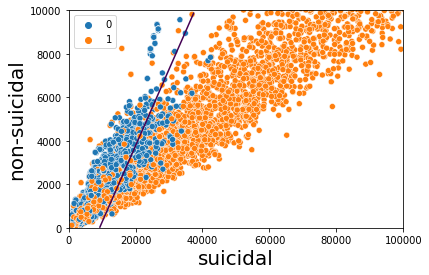

In [ ]:

# required libraries
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report
import json

from google.colab import drive
drive.mount('/content/drive')

def main():

  labels_data_frame = pd.read_csv('/content/drive/MyDrive/Research/ML Research/twitter_suicide_data.csv')
  labels = labels_data_frame["intention"].values
  print(labels.sum())
  print(labels.shape)

  features_data_frame = pd.read_csv('/content/drive/MyDrive/Research/ML Research/features.csv')
  features = features_data_frame[["suicidal","non-suicidal"]].values

  # feature engineering
  # engineered_features = []
  # for i in range(0, len(features)):
    # engineered_features.append(features[i][0])
    # engineered_features.append(features[i][1])
    # engineered_features.append(features[i][0] * features[i][0])
    # engineered_features.append(features[i][0] * features[i][1])
    # engineered_features.append(features[i][1] * features[i][1])
  
  # engineered_features = np.array(engineered_features)
  # engineered_features = engineered_features.reshape(-1,5)

  # splitting into training and validation set
  x_training, x_validation, y_training, y_validation = train_test_split(features, labels, test_size = 0.25, random_state = 4)

  # scaling the features
  scaler = preprocessing.StandardScaler()
  scaler.fit(x_training)
  x_training_scaled = scaler.transform(x_training)
  x_validation_scaled = scaler.transform(x_validation)

  # calculating error
  bce = BinaryCrossentropy(from_logits = False)

  # creating the model
  model = Sequential()
  model.add(Dense(1, activation = "sigmoid"))
  model.compile(loss = "binary_crossentropy")
  model.fit(x_training_scaled,y_training,epochs = 350, verbose = 0)
  error_history = model.history.history["loss"]
  plt.plot(error_history)

  # creating a decision boundary and scatterplot
  sns.scatterplot(features[:,0], features[:,1], hue = labels)
  x1, xr, dx = 0, 100000, 1000
  y1, yr, dy = 0, 10000, 100
  u = np.arange(x1,xr,dx)
  v = np.arange(y1,yr,dy)
  u_r = np.ones((len(v),1))*u.reshape(1,len(u))
  v_r = v.reshape(len(v),1)*np.ones((1,len(u)))
  u_r = u_r.reshape(-1)
  v_r = v_r.reshape(-1)
  p_grid = np.column_stack((u_r, v_r))
  p_grid_scaled = scaler.transform(p_grid)
  f_grid = model.predict(p_grid_scaled)
  f_grid = f_grid.reshape((len(v), len(u)))
  plt.contour(u,v,f_grid,levels = [0.5])
  plt.xlabel("suicidal", fontsize = 20)
  plt.ylabel("non-suicidal", fontsize = 20)
  plt.xlim(0,xr)
  plt.ylim(0,yr)

  #calculating the error of the model
  y_training_hat = model.predict(x_training_scaled)
  print("binary crossetropy error for training set:", bce(y_training.reshape(-1,1), y_training_hat).numpy())
  y_validation_hat = model.predict(x_validation_scaled)
  print("binary crossentropy error for validation set:", bce(y_validation.reshape(-1,1), y_validation_hat).numpy())

  # calculating accuracy on training set
  y_training_hat_cat = 1*(model.predict(x_training_scaled) > 0.5)
  print(classification_report(y_training, y_training_hat_cat))

  # caluclating accuray on valdiation set
  y_validation_hat_cat = 1*(model.predict(x_validation_scaled) > 0.5)
  print(classification_report(y_validation, y_validation_hat_cat))

  tweet = input("Tweet: ")
  proccessed_tweets = []

  # tokenizing the tweets
  tokenizer = TweetTokenizer()
  tokenized_list = tokenizer.tokenize(tweet)

  for i in range(len(tokenized_list)):
    proccessed_tweets.append(tokenized_list[i])
  print(proccessed_tweets)

  # removing stop words
  nltk.download('stopwords')
  stop_words = stopwords.words('english')
  removing(proccessed_tweets, stop_words)

  # removing punctuation
  # all standard punctuation has been already removed from the dataset, but emoticons are still present
  punctuation_string = string.punctuation
  punctuation = tokenizer.tokenize(punctuation_string)
  removing(proccessed_tweets, punctuation)

  final_tweet = []

  # stemming words
  stemmer = PorterStemmer()
  for i in range(len(proccessed_tweets)):
    pre_stemmed = proccessed_tweets[i]
    stemmed_word = stemmer.stem(pre_stemmed)
    final_tweet.append(stemmed_word)
  
  # removing white spaces
  blank = 0
  for i in range(len(final_tweet)):
    if final_tweet[i] == "":
      blank += 1

  for i in range(blank):
    final_tweet.remove("")
  
  print(final_tweet)

  # turning features JSON file into dictionary
  with open('frequency.json') as json_file:
    frequency = json.load(json_file)

  print(frequency)

  total_suicidal_value = 0
  total_non_suicidal_value = 0

  for word in final_tweet:

    suicidal_value = 0
    non_suicidal_value = 0

    suicidal_key = word + " ,1"
    non_suicidal_key = word + " ,0"

    print("suicidal_key: ", suicidal_key)
    print("non-suicidal_key: ", non_suicidal_key)

    if suicidal_key in frequency:
      suicidal_value = frequency[suicidal_key]
      print("suicidal value: ", suicidal_value)
    if non_suicidal_key in frequency:
      non_suicidal_value = frequency[non_suicidal_key]
      print("in conditional")
      print("non-suicidal value: ", non_suicidal_value)
    
    total_suicidal_value += suicidal_value
    total_non_suicidal_value += non_suicidal_value

  print("total suicidal value: ", total_suicidal_value)
  print("total non suicidal value: ", total_non_suicidal_value)

  features_input = [total_suicidal_value, total_non_suicidal_value]
  
  features_input = np.array(features_input)
  features_input = features_input.reshape(-1,2)
  print(features_input)

  x_input = scaler.transform(features_input)
  print("scaled features: ", x_input)
  
  predicted_output = model.predict(x_input)
  if predicted_output >= 0.5:
    print("suicidal, exact probability: ", predicted_output)
  else:
    print("non-suicidal, exact probability: ", predicted_output)

# function to remove stop words and punctuation
def removing(tweets, removing):

main()
